In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import sys
from ipywidgets import interact
import datetime

sys.path.insert(0, "D:/GIUSEPPE/Universita/TesiMagistrale/Kuramoto/Codice/modified")
%load_ext autoreload
%autoreload 2
from kuramoto import Kuramoto, plotting
# the above two lines are needed in order to see the modifications in python files without restarting vscode, 2 means that all modules will be reimported

Varying only the coupling between oscillators

In [2]:
# Varying  only the coupling between oscillators
# Parameters

N = 10 # number of nodes
dt = 0.01 # time step
t_max = 600 # max time of the simulation
t_steps = int(t_max/dt) # number of time steps
omega_f = 1 # frequence of the external field
sigma = 1 # sigma of the initial distribution of the frequencies (gaussian distribution), the mean is set at 0
t_eq = 300 # equilibration time
delta_t = t_max - t_eq # time in which i calculate r and r_link
n_try = 3 # number of try in order to mediate the results
c_max = 0.2 # maximum value of the coupling
c_points = 21 # number of coupling points
ce = 0.0 # external coupling

In [6]:

# Vary only the coupling between the oscillators

r1 = []
r_link1 = []
r2 = []
r_link2 = []

now_0 = datetime.datetime.now()
print('Beginning of the simulation:', now_0, '\n')
for c in np.linspace(0, c_max, c_points):
    print('##############')
    print('##############')
    print('Coupling:', c)
    print('##############')
    print('##############')
    order1 = []
    order2 = []
    local1 = []
    local2 = []
    for i in range(n_try):
        now1 = datetime.datetime.now()
        print('##############')
        print('Run number:', i + 1)
        print('##############')
        print('Current time:', now1)
        print('Elapsed time since the beginning:', now1 - now_0, '\n')
        
        model1 = Kuramoto(coupling = c, dt = dt, t_max = t_max, n_nodes = N, coupling_ext = ce, omega_f = omega_f, sigma = sigma)
        graph_nx1 = nx.erdos_renyi_graph(n = N, p = 6/(N-1)); title1 = 'Erdos-Renyi'
        print('Network:', title1)
        graph1 = nx.to_numpy_array(graph_nx1)
        act_mat1 = model1.run(adj_mat = graph1)
        order1.append([Kuramoto.phase_coherence(vec) for vec in act_mat1.T])
        local1.append(Kuramoto.r_link(graph1, act_mat1, delta_t, t_eq, dt))

        model2 = Kuramoto(coupling = c, dt = dt, t_max = t_max, n_nodes = N, coupling_ext = ce, omega_f = omega_f, sigma = sigma)
        graph_nx2 = nx.barabasi_albert_graph(N, m = 3); title2 = 'Barabasi-Albert'
        print('\n', 'Network:', title2, '\n')
        graph2 = nx.to_numpy_array(graph_nx2)
        act_mat2 = model2.run(adj_mat = graph2)
        order2.append([Kuramoto.phase_coherence(vec) for vec in act_mat2.T])
        local2.append(Kuramoto.r_link(graph2, act_mat2, delta_t, t_eq, dt))

        print('Time of the run', datetime.datetime.now() - now1, '\n')
    print('\n')    
    r1.append(order1)
    r_link1.append(local1)
    
    r2.append(order2)
    r_link2.append(local2)
    
now_f = datetime.datetime.now()
print('End of the simulation', now_f)
print('Total time of the simulation', now_f - now_0)

Beginning of the simulation: 2025-02-03 09:08:12.899290 

##############
##############
Coupling: 0.0
##############
##############
##############
Run number: 1
##############
Current time: 2025-02-03 09:08:12.907320
Elapsed time since the beginning: 0:00:00.008030 

Network: Erdos-Renyi

 Network: Barabasi-Albert 

Time of the run 0:00:54.258692 

##############
Run number: 2
##############
Current time: 2025-02-03 09:09:07.166012
Elapsed time since the beginning: 0:00:54.266722 

Network: Erdos-Renyi

 Network: Barabasi-Albert 

Time of the run 0:00:53.790742 

##############
Run number: 3
##############
Current time: 2025-02-03 09:10:00.956754
Elapsed time since the beginning: 0:01:48.057464 

Network: Erdos-Renyi

 Network: Barabasi-Albert 

Time of the run 0:00:53.349210 



##############
##############
Coupling: 0.01
##############
##############
##############
Run number: 1
##############
Current time: 2025-02-03 09:10:54.305964
Elapsed time since the beginning: 0:02:41.406674 

In [7]:
print('Write data to file')
now_w = datetime.datetime.now()
print('Current time', now_w)

r1 = np.array(r1, dtype='float32')
r_link1 = np.array(r_link1, dtype='float32')
r2 = np.array(r2, dtype='float32')
r_link2 = np.array(r_link2, dtype='float32')

file1 = open("test_order_er.txt", "w") 
file2 = open("test_order_ba.txt", "w") 
file_link1 = open("test_local_er.txt", "w") 
file_link2 = open("test_local_ba.txt", "w") 

for i in range(c_points):
   for j in range(n_try):
      for k in range(t_steps):
         file1.write(str(format(r1[i,j,k], '.8f')) + ' ')
         file2.write(str(format(r2[i,j,k], '.8f')) + ' ')
      file1.write('\n')
      file2.write('\n')     

file1.close()
file2.close()

for i in range(c_points):
   for j in range(n_try):
      file_link1.write(str(format(r_link1[i,j], '.8f')) + ' ')
      file_link2.write(str(format(r_link2[i,j], '.8f')) + ' ')
   file_link1.write('\n')
   file_link2.write('\n')

file_link1.close()
file_link2.close()

print('Data written to file')
print('Elapsed time', datetime.datetime.now() - now_w)

Write data to file
Current time 2025-02-04 08:27:53.380218
Data written to file
Elapsed time 0:00:41.918458


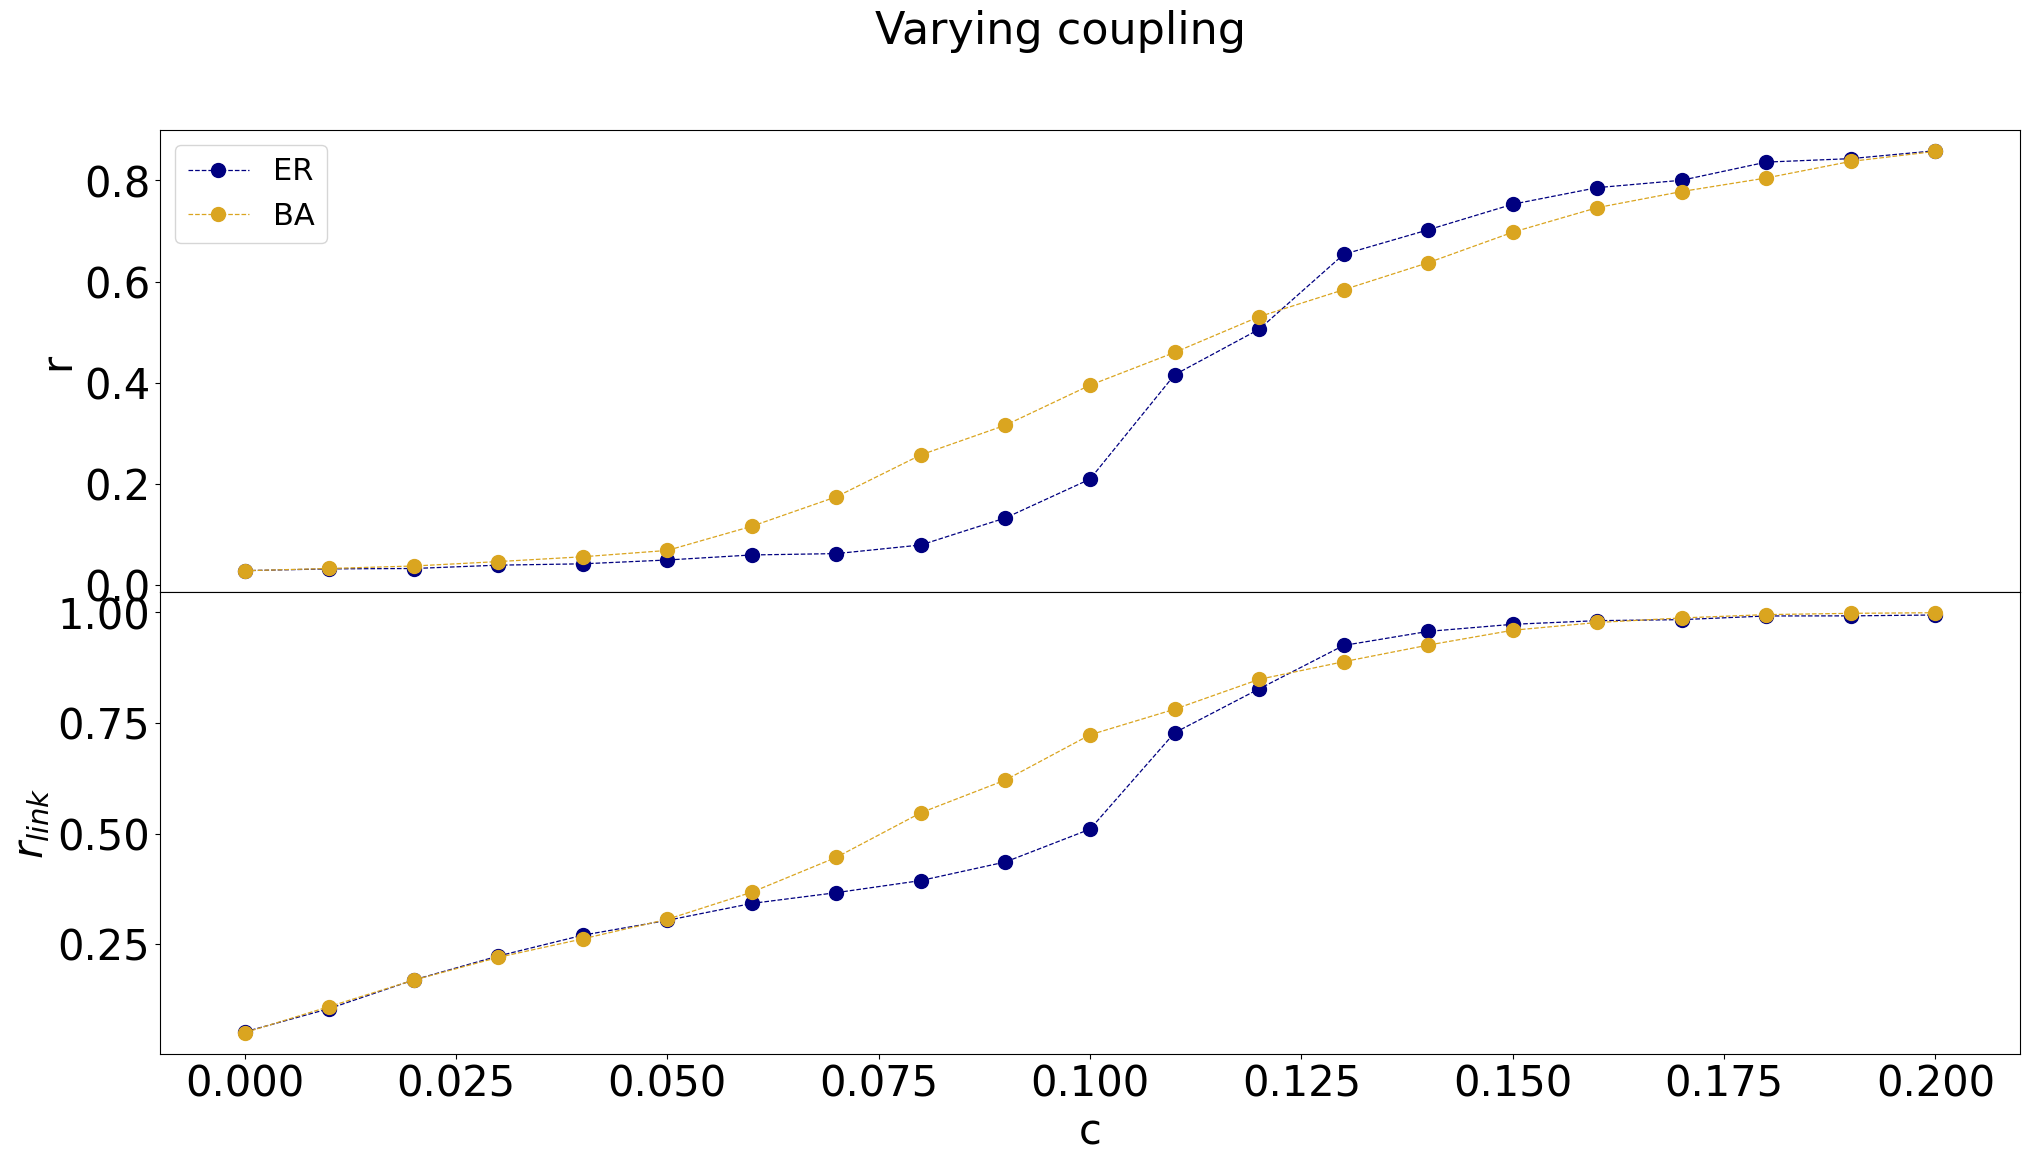

In [9]:
f1 = np.genfromtxt("test_order_er.txt") 
f1 = f1.reshape((c_points, n_try, t_steps))
f2 = np.genfromtxt("test_order_ba.txt")
f2 = f2.reshape((c_points, n_try, t_steps))
f_link1 = np.genfromtxt("test_local_er.txt") 
f_link2 = np.genfromtxt("test_local_ba.txt") 

f1 = f1[:, :, t_eq:] 
f2 = f2[:, :, t_eq:] 

# f1_new = np.mean(f1, axis = 2)
# f1_err = np.empty((c_points, n_try))
# f1_av = np.mean(f1, axis = (1,2))
# for i in range(c_points):
#     for j in range(n_try):
#         f1_err[i,j] = f1_new[i,j] - f1_av[i]
# f1_err = np.abs(np.mean(f1_err, axis = 1))



plotting.plot_order_params(np.mean(f1, axis = (1,2)), np.mean(f_link1, axis = 1),
                           np.mean(f2, axis = (1,2)), np.mean(f_link2, axis = 1), 
                           c_max,c_points, title = 'Varying coupling', xlab = 'c')

In [40]:
print(f1.shape)
#print(f1[:, 0, 0].shape)
f1_new = np.mean(f1, axis = 2)
f1_err = np.empty((c_points, n_try))
f1_av = np.mean(f1, axis = (1,2))
for i in range(c_points):
    for j in range(n_try):
        f1_err[i,j] = f1_new[i,j] - f1_av[i]
f1_err = np.mean(f1_err, axis = 1)
print(f1_err)
#print(np.mean(f1, axis = (1,2)))

(21, 3, 59700)
[ 9.25185854e-18 -1.15648232e-18  2.31296463e-18 -4.62592927e-18
  0.00000000e+00 -1.15648232e-17  6.93889390e-18  6.93889390e-18
 -4.62592927e-18  0.00000000e+00  1.85037171e-17 -5.55111512e-17
 -3.70074342e-17  7.40148683e-17  0.00000000e+00 -7.40148683e-17
 -1.11022302e-16  7.40148683e-17 -3.70074342e-17  7.40148683e-17
  2.22044605e-16]


In [35]:
a = np.array([[0,2,4], [6,8,10]])
print(a.shape)
a_av = np.mean(a, axis = 1)
a_er = np.empty((2,3))
for i in range(2):
    for j in range(3):
        a_er[i,j] = a[i,j] - a_av[i]
print(a_av)
print(a_er)
err = np.mean(a_er, axis = 1)
print(err)

(2, 3)
[2. 8.]
[[-2.  0.  2.]
 [-2.  0.  2.]]
[0. 0.]


Varying only the external coupling

In [27]:
# Varying only the external coupling
# Parameters

N = 1000 # number of nodes
dt = 0.01 # time step
t_max = 600 # max time of the simulation
t_steps = int(t_max/dt) # number of time steps
omega_f = 1 # frequence of the external field
sigma = 1 # sigma of the initial distribution of the frequencies (gaussian distribution), the mean is set at 0
t_eq = 300 # equilibration time
delta_t = t_max - t_eq # time in which i calculate r and r_link
n_try = 2 # number of try in order to mediate the results
ce_max = 1.7 # maximum value of the coupling
ce_points = 21 # number of coupling points
c = 0.0

In [28]:
# Vary only the external coupling

r1 = []
r_link1 = []
r2 = []
r_link2 = []

now_0 = datetime.datetime.now()
print('Beginning of the simulation:', now_0, '\n')
for ce in np.linspace(0, ce_max, ce_points):
    print('##############')
    print('##############')
    print('External coupling:', ce)
    print('##############')
    print('##############')
    order1 = []
    order2 = []
    local1 = []
    local2 = []
    for i in range(n_try):
        now1 = datetime.datetime.now()
        print('##############')
        print('Run number:', i + 1)
        print('##############')
        print('Current time:', now1)
        print('Elapsed time since the beginning:', now1 - now_0, '\n')
        
        model1 = Kuramoto(coupling = c, dt = dt, t_max = t_max, n_nodes = N, coupling_ext = ce, omega_f = omega_f)
        graph_nx1 = nx.erdos_renyi_graph(n = N, p = 6/(N-1)); title1 = 'Erdos-Renyi'
        print('Network:', title1)
        graph1 = nx.to_numpy_array(graph_nx1)
        act_mat1 = model1.run(adj_mat = graph1)
        order1.append([Kuramoto.phase_coherence(vec) for vec in act_mat1.T])
        local1.append(Kuramoto.r_link(graph1, act_mat1, delta_t, t_eq, dt))

        model2 = Kuramoto(coupling = c, dt = dt, t_max = t_max, n_nodes = N, coupling_ext = ce, omega_f = omega_f)
        graph_nx2 = nx.barabasi_albert_graph(N, m = 3); title2 = 'Barabasi-Albert'
        print('\n', 'Network:', title2, '\n')
        graph2 = nx.to_numpy_array(graph_nx2)
        act_mat2 = model2.run(adj_mat = graph2)
        order2.append([Kuramoto.phase_coherence(vec) for vec in act_mat2.T])
        local2.append(Kuramoto.r_link(graph2, act_mat2, delta_t, t_eq, dt))

        print('Time of the run', datetime.datetime.now() - now1, '\n')
    print('\n')    
    r1.append(order1)
    r_link1.append(local1)
    
    r2.append(order2)
    r_link2.append(local2)
    
now_f = datetime.datetime.now()
print('End of the simulation', now_f)
print('Total time of the simulation', now_f - now_0)

Beginning of the simulation: 2025-06-25 12:03:06.083430 

##############
##############
External coupling: 0.0
##############
##############
##############
Run number: 1
##############
Current time: 2025-06-25 12:03:06.085889
Elapsed time since the beginning: 0:00:00.002459 

Network: Erdos-Renyi

 Network: Barabasi-Albert 

Time of the run 0:00:57.148393 

##############
Run number: 2
##############
Current time: 2025-06-25 12:04:03.234282
Elapsed time since the beginning: 0:00:57.150852 

Network: Erdos-Renyi

 Network: Barabasi-Albert 

Time of the run 0:00:54.585606 



##############
##############
External coupling: 0.08499999999999999
##############
##############
##############
Run number: 1
##############
Current time: 2025-06-25 12:04:57.819888
Elapsed time since the beginning: 0:01:51.736458 

Network: Erdos-Renyi

 Network: Barabasi-Albert 

Time of the run 0:04:11.238313 

##############
Run number: 2
##############
Current time: 2025-06-25 12:09:09.058201
Elapsed time sin

In [29]:
print('Writting data to file')
now_w = datetime.datetime.now()
print('Current time', now_w)

r1 = np.array(r1, dtype='float32')
r_link1 = np.array(r_link1, dtype='float32')
r2 = np.array(r2, dtype='float32')
r_link2 = np.array(r_link2, dtype='float32')

file1 = open("order_er.txt", "w") 
file2 = open("order_ba.txt", "w") 
file_link1 = open("local_er.txt", "w") 
file_link2 = open("local_ba.txt", "w") 

for i in range(ce_points):
   for j in range(n_try):
      for k in range(t_steps):
         file1.write(str(format(r1[i,j,k], '.8f')) + ' ')
         file2.write(str(format(r2[i,j,k], '.8f')) + ' ')
      file1.write('\n')
      file2.write('\n')     

file1.close()
file2.close()

for i in range(ce_points):
   for j in range(n_try):
      file_link1.write(str(format(r_link1[i,j], '.8f')) + ' ')
      file_link2.write(str(format(r_link2[i,j], '.8f')) + ' ')
   file_link1.write('\n')
   file_link2.write('\n')
      

file_link1.close()
file_link2.close()

print('Data written to file')
print('Elapsed time', datetime.datetime.now() - now_w)

Writting data to file
Current time 2025-06-25 16:44:17.446613
Data written to file
Elapsed time 0:00:07.594767


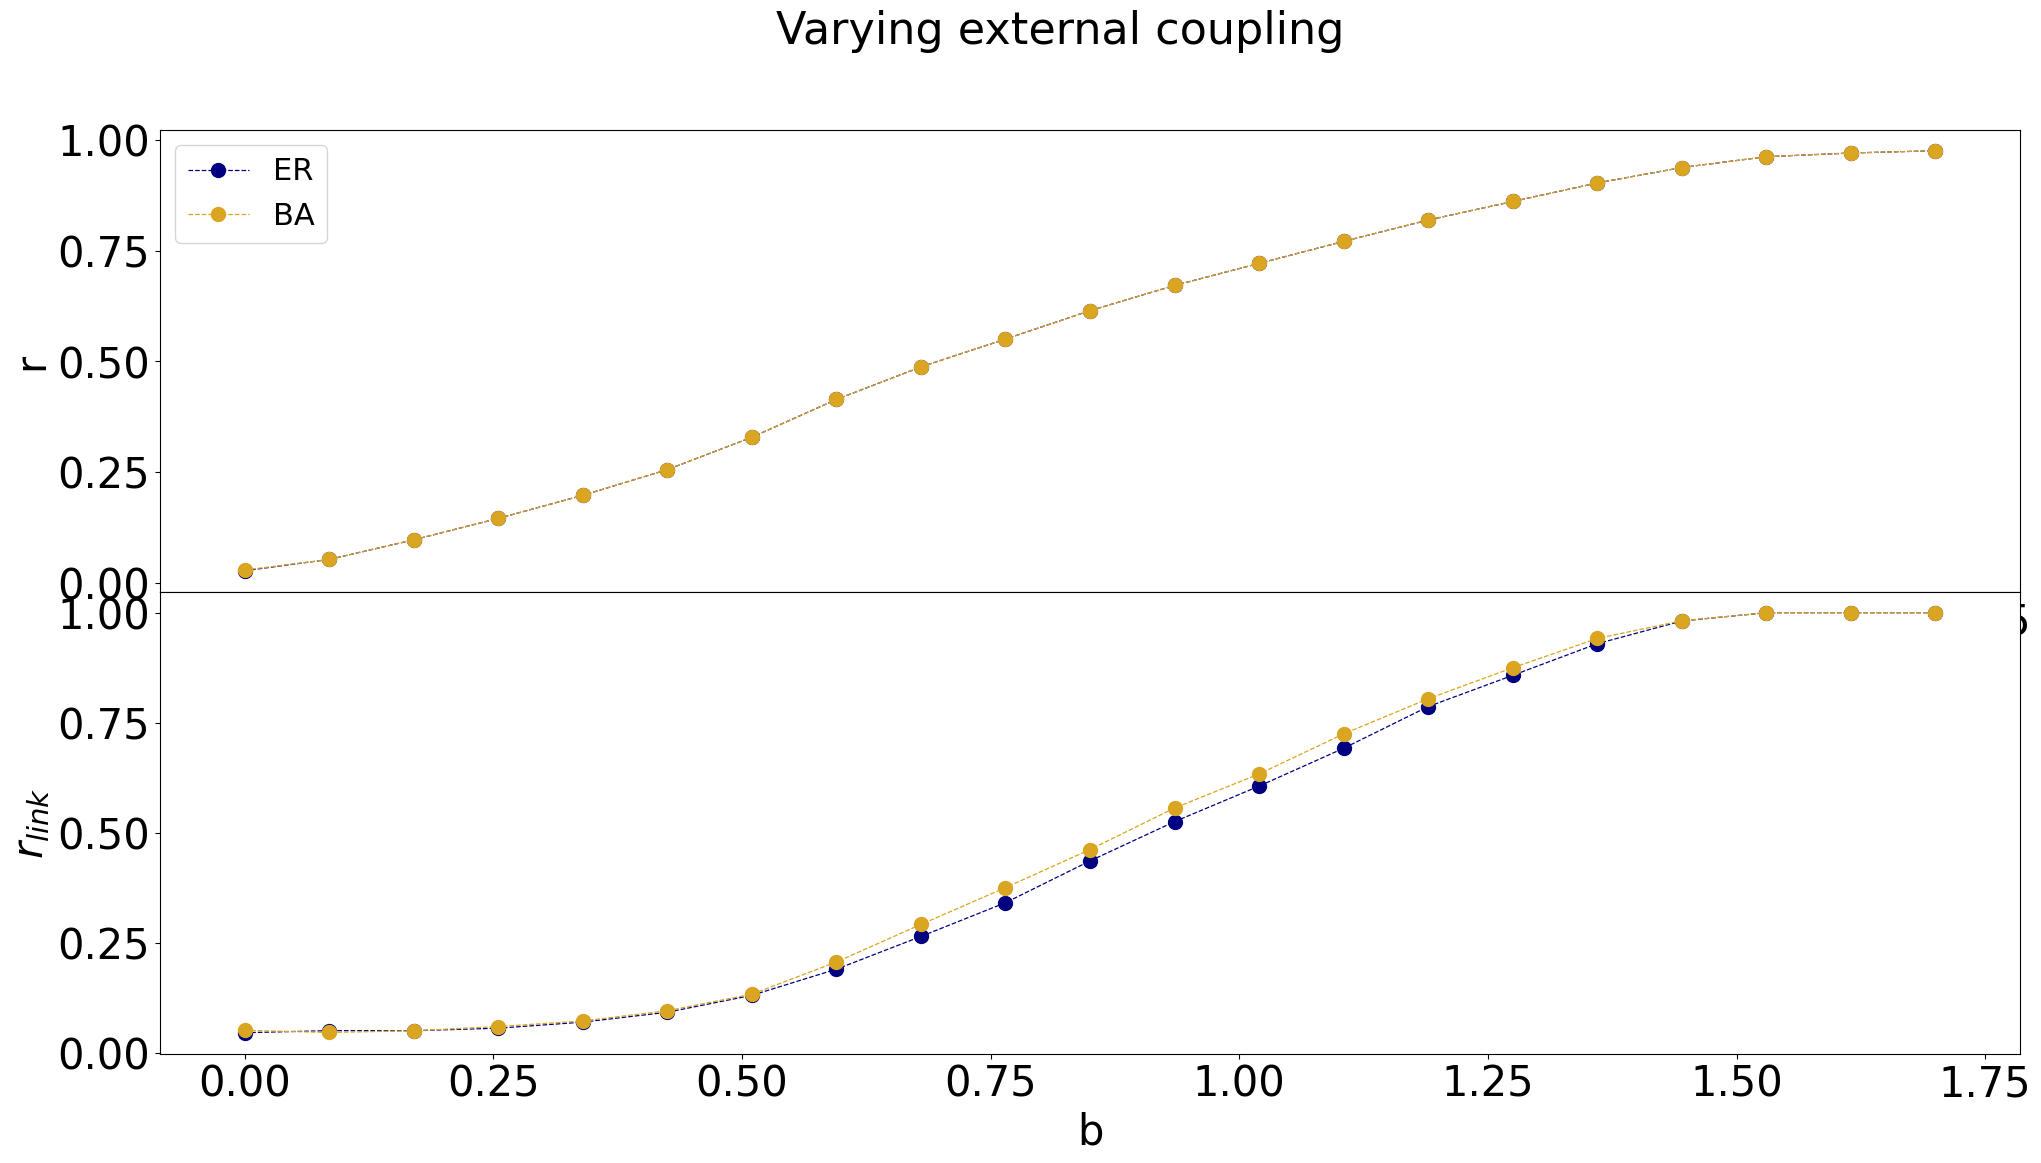

In [33]:
f1 = np.genfromtxt("order_er.txt") 
f1 = f1.reshape((ce_points, n_try, t_steps))
f2 = np.genfromtxt("order_ba.txt") 
f2 = f2.reshape((ce_points, n_try, t_steps))
f_link1 = np.genfromtxt("local_er.txt") 
f_link2 = np.genfromtxt("local_ba.txt") 

f1 = f1[:, :, t_eq:] 
f2 = f2[:, :, t_eq:] 

plotting.plot_order_params(np.mean(f1, axis = (1,2)), np.mean(f_link1, axis = 1),
                           np.mean(f2, axis = (1,2)), np.mean(f_link2, axis = 1), 
                           ce_max,ce_points, title = 'Varying external coupling', xlab = 'b')

In [2]:
# Vary both c and ce

N = 1000 # number of nodes
dt = 0.01 # time step
t_max = 600 # max time of the simulation
t_steps = int(t_max/dt) # number of time steps
omega_f = 1 # frequence of the external field
sigma = 1 # sigma of the initial distribution of the frequencies (gaussian distribution), the mean is set at 0
t_eq = 300 # equilibration time
delta_t = t_max - t_eq # time in which i calculate r and r_link
n_try = 3
c_max = 0.2
ce_max = 1.7
c_points = 20
ce_points = 20

Varying both c and ce

In [24]:
# r1 = []
# r_link1 = []
# r2 = []
# r_link2 = []

# now_0 = datetime.datetime.now()
# print('Beginning of the simulation:', now_0, '\n')
# for c in np.linspace(0, c_max, c_points):
#     print('##############')
#     print('##############')
#     print('Coupling:', c)
#     print('##############')
#     print('##############')
#     ord1 = []
#     ord2 = []
#     local1 = []
#     local2 = []
#     for ce in np.linspace (0, ce_max, ce_points):
#         print('##############')
#         print('##############')
#         print('External coupling:', ce)
#         print('##############')
#         print('##############')
#         nowc = datetime.datetime.now()
#         print('Current time:', nowc)
#         print('Elapsed time since the beginning:', nowc - now_0, '\n')
#         order1 = []
#         order2 = []
#         link1 = []
#         link2 = []
#         for i in range(n_try):
#             now1 = datetime.datetime.now()
#             print('##############')
#             print('Run number:', i + 1)
#             print('##############')
#             print('Current time:', now1)
#             print('Elapsed time since the beginning:', now1 - now_0, '\n')
            
#             model1 = Kuramoto(coupling = c, dt = dt, t_max = t_max, n_nodes = N, coupling_ext = ce, omega_f = omega_f, sigma = sigma)
#             graph_nx1 = nx.erdos_renyi_graph(n = N, p = 6/(N-1)); title1 = 'Erdos-Renyi'
#             print('Network:', title1)
#             graph1 = nx.to_numpy_array(graph_nx1)
#             act_mat1 = model1.run(adj_mat = graph1)
#             order1.append([Kuramoto.phase_coherence(vec) for vec in act_mat1.T])
#             link1.append(Kuramoto.r_link(graph1, act_mat1, delta_t, t_eq, dt))

#             model2 = Kuramoto(coupling = c, dt = dt, t_max = t_max, n_nodes = N, coupling_ext = ce, omega_f = omega_f, sigma = sigma)
#             graph_nx2 = nx.barabasi_albert_graph(N, m = 3); title2 = 'Barabasi-Albert'
#             print('\n', 'Network:', title2, '\n')
#             graph2 = nx.to_numpy_array(graph_nx2)
#             act_mat2 = model2.run(adj_mat = graph2)
#             order2.append([Kuramoto.phase_coherence(vec) for vec in act_mat2.T])
#             link2.append(Kuramoto.r_link(graph2, act_mat2, delta_t, t_eq, dt))

#             print('Time of the run', datetime.datetime.now() - now1, '\n')
                   
#         ord1.append(order1)
#         ord2.append(order2)
#         local1.append(link1)
#         local2.append(link2)
        
#     r1.append(ord1)
#     r2.append(ord2)
#     r_link1.append(local1)
#     r_link2.append(local2)

Beginning of the simulation: 2025-01-27 10:49:51.320676 

##############
##############
Coupling: 0.0
##############
##############
##############
##############
External coupling: 0.0
##############
##############
Current time: 2025-01-27 10:49:51.321704
Elapsed time since the beginning: 0:00:00.001028 

##############
Run number: 1
##############
Current time: 2025-01-27 10:49:51.321704
Elapsed time since the beginning: 0:00:00.001028 

Network: Erdos-Renyi

 Network: Barabasi-Albert 

Time of the run 0:00:14.049693 

##############
Run number: 2
##############
Current time: 2025-01-27 10:50:05.372394
Elapsed time since the beginning: 0:00:14.051718 

Network: Erdos-Renyi

 Network: Barabasi-Albert 

Time of the run 0:00:00.151563 

##############
Run number: 3
##############
Current time: 2025-01-27 10:50:05.523957
Elapsed time since the beginning: 0:00:14.203281 

Network: Erdos-Renyi

 Network: Barabasi-Albert 

Time of the run 0:00:00.184376 

##############
##############
Extern

In [ ]:
# print('Writing data to file')
# now_w = datetime.datetime.now()
# print('Current time', now_w)

# r1 = np.array(r1, dtype='float32')
# r_link1 = np.array(r_link1, dtype='float32')
# r2 = np.array(r2, dtype='float32')
# r_link2 = np.array(r_link2, dtype='float32')

# file1 = open("r_er.txt", "w") 
# file2 = open("r_ba.txt", "w") 
# file_link1 = open("rlink_er.txt", "w") 
# file_link2 = open("rlink_ba.txt", "w") 

# for i in range(c_points):
#     for j in range(ce_points):
#         for k in range(n_try):
#             for h in range(t_steps):
#                 file1.write(str(format(r1[i,j,k,h], '.8f')) + ' ')
#                 file2.write(str(format(r2[i,j,k,h], '.8f')) + ' ')
#             file1.write('\n')
#             file2.write('\n') 

# file1.close()
# file2.close()

# for i in range(c_points):
#     for j in range(ce_points):
#         for k in range(n_try):
#             file_link1.write(str(format(r_link1[i,j,k], '.8f')) + ' ')
#             file_link2.write(str(format(r_link2[i,j,k], '.8f')) + ' ')
#     file_link1.write('\n')
#     file_link2.write('\n')
      

# file_link1.close()
# file_link2.close()

# print('Data written to file')
# print('Elapsed time', datetime.datetime.now() - now_w)

In [3]:
f1 = np.genfromtxt("r_er.txt") 
f1 = f1.reshape((c_points, ce_points, n_try, t_steps))
f2 = np.genfromtxt("r_ba.txt") 
f2 = f2.reshape((c_points, ce_points, n_try, t_steps))
f_link1 = np.genfromtxt("rlink_er.txt")
f_link1 = f_link1.reshape((c_points, ce_points, n_try))
f_link2 = np.genfromtxt("rlink_ba.txt")
f_link2 = f_link2.reshape((c_points, ce_points, n_try))

In [4]:
r1 = f1
r2 = f2
r_link1 = f_link1
r_link2 = f_link2

In [5]:
r1 = r1[:, :, :, int(t_eq/dt):]
r1 = np.mean(r1, axis = (2,3))
r2 = r2[:, :, :, int(t_eq/dt):]
r2 = np.mean(r2, axis = (2,3))
r_link2 = np.mean(r_link2, axis = 2)
r_link1 = np.mean(r_link1, axis = 2)

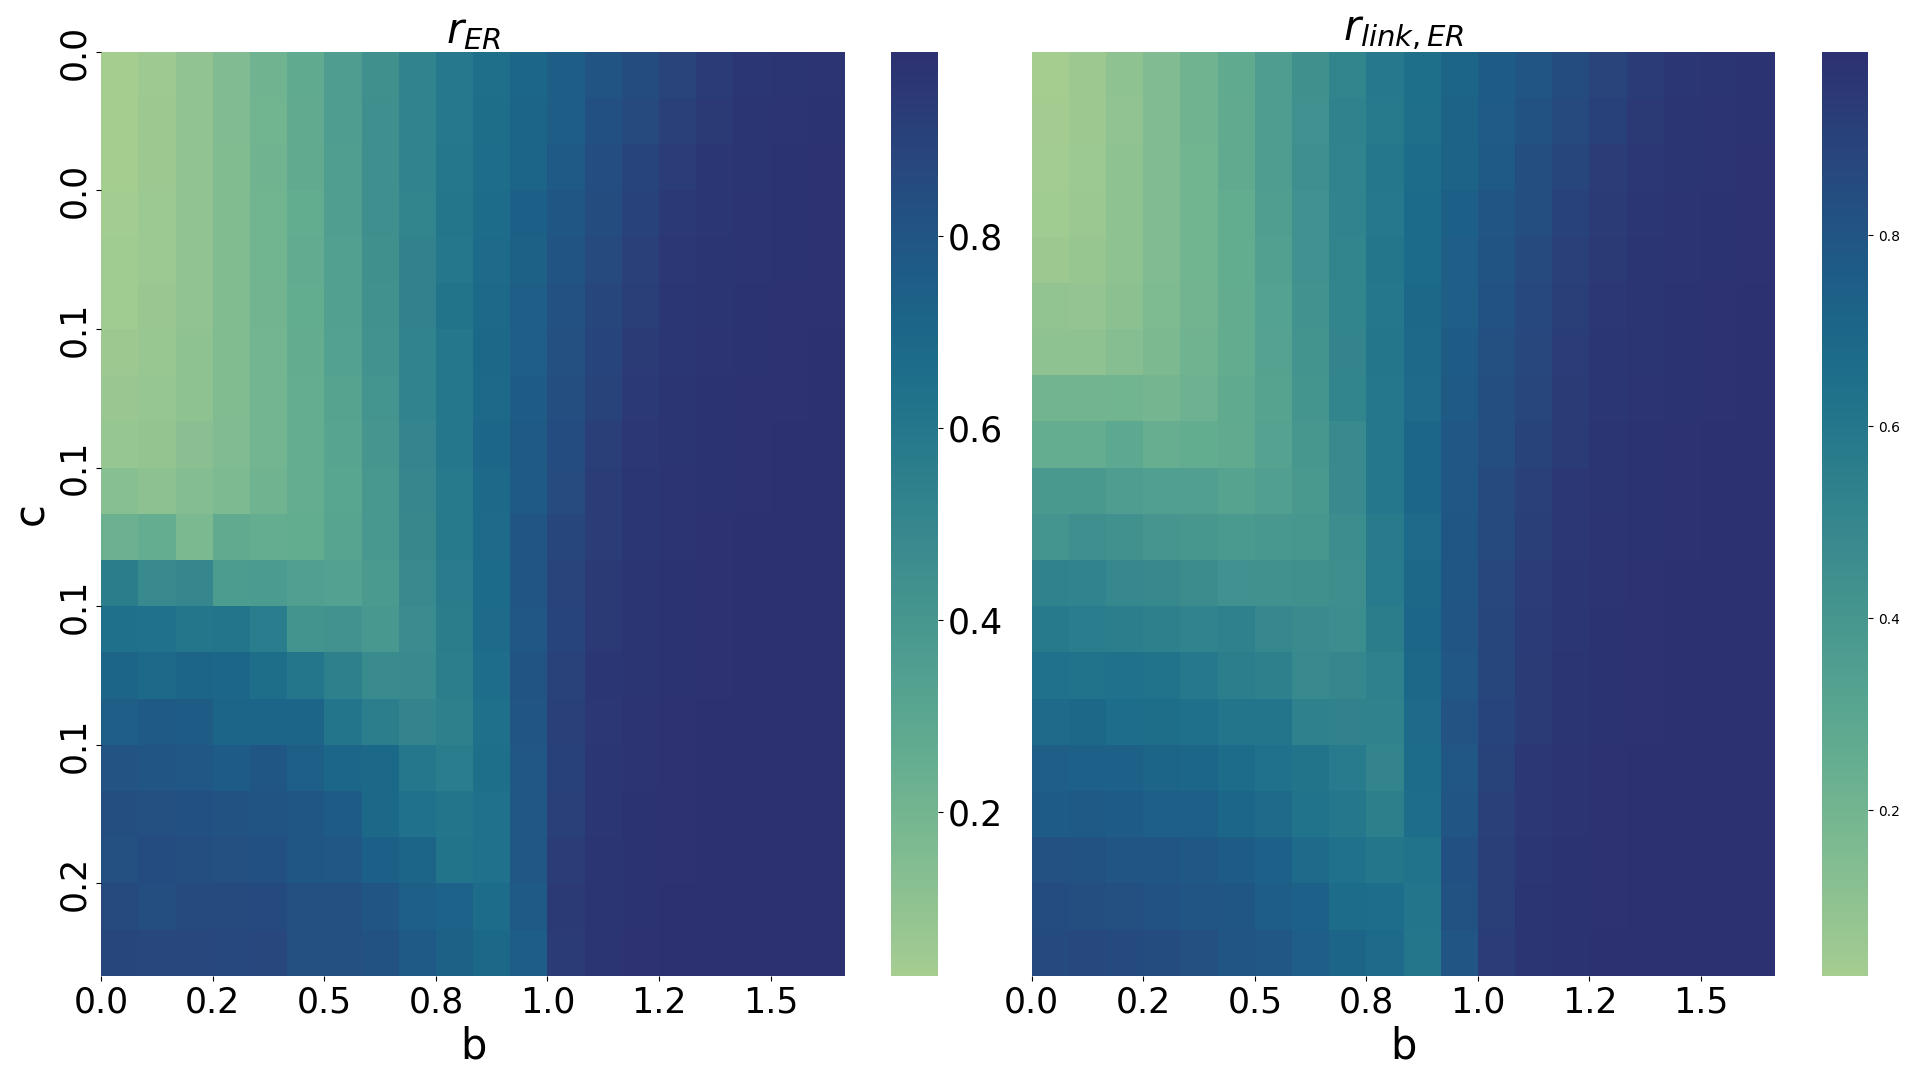

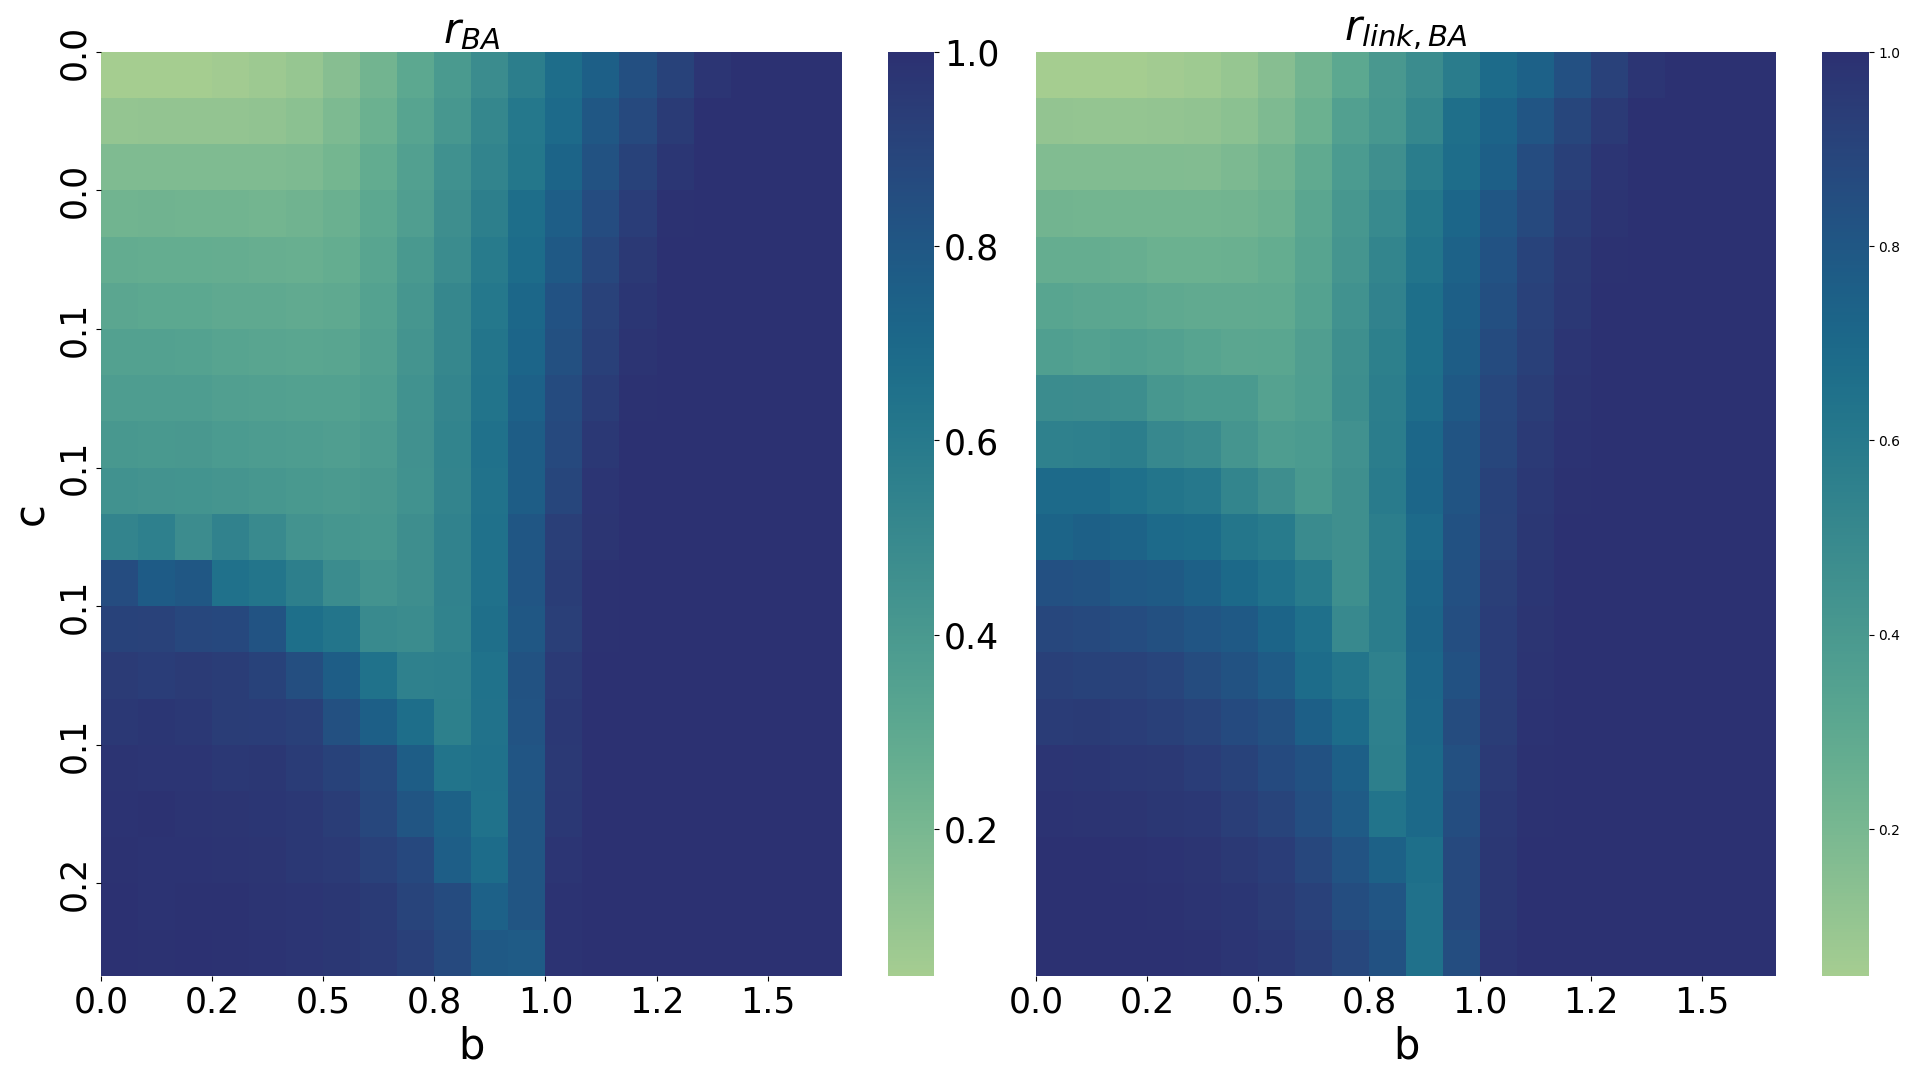

In [29]:
plotting.plot_heat_n(r1, r_link1, r2, r_link2, c_max, c_points, ce_max, ce_points)